## Model Evaluation

In [1]:
import json
import pandas as pd
import numpy as np
import copy

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

from IPython.display import Image

from dataclasses import dataclass

In [2]:
# to open json after training
json_file = open('../results/epoch_results.json')
epoch_results = json.load(json_file)

In [3]:
# convert json to a dataframe ready to use by plotly
epoch_results_df = []

for model, metrics in epoch_results.items():
    for metric, values in metrics.items():
        for index, value in enumerate(values):
            item = [model, metric, index + 1, value]
            epoch_results_df.append(item)

# put it as a dataframe
epoch_results_df = pd.DataFrame(data = epoch_results_df, columns = ['model', 'metric', 'epoch', 'value'])

In [4]:
epoch_results_df.head()

,model,metric,epoch,value
0,sequential,loss,1,2.219139
1,sequential,loss,2,1.049326
2,sequential,loss,3,1.005399
3,sequential,loss,4,0.934799
4,sequential,loss,5,0.923624


In [5]:
@dataclass
class LineChart():

    epoch_results: pd.DataFrame

    def create_line_chart(self, metrics: list, button=True):
        '''Method to visualize some metrics with plotly'''

        # df for chart
        df_for_chart = self.epoch_results[self.epoch_results['metric'].isin(metrics)]
        df_for_chart['model_metric'] = df_for_chart.apply(lambda row: f"{row['model']}_{row['metric']}", axis=1)

        df_for_chart = df_for_chart.sort_values(by=['epoch', 'model'], ascending=[True, True])
        buttons=df_for_chart['model'].unique()

        # create chart
        fig = px.line(df_for_chart, x='epoch', y='value', color='model_metric')
        self.button_layout(fig, buttons=buttons)

        return fig


    def button_layout(self, fig, buttons:list):

        def button_organizer(buttons:list=buttons):
            
            buttons_output=[]
            buttons_length=len(buttons)

            none_button=dict(label="None", method="update", args=[{"visible":[True]}, {"title":"ALL"}])
            buttons_output.append(none_button)

            base_array=[False]*buttons_length*2

            for key, button in enumerate(buttons):

                button_array = copy.deepcopy(base_array)
                button_array[key*2:(key*2)+2] = [True]*2
                button_model=dict(label=f"{button}", method="update", args=[{"visible":button_array}, {"title":f"{button}"}])
                buttons_output.append(button_model)

            return buttons_output

        fig.update_layout(updatemenus=[dict(active=0,buttons=list(button_organizer(buttons)))])

In [6]:
line_chart = LineChart(epoch_results=epoch_results_df)
fig = line_chart.create_line_chart(metrics=['accuracy', 'val_accuracy'])
fig.show()

c:\Users\SILVAFRA\Anaconda3\envs\python-cvcourse\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



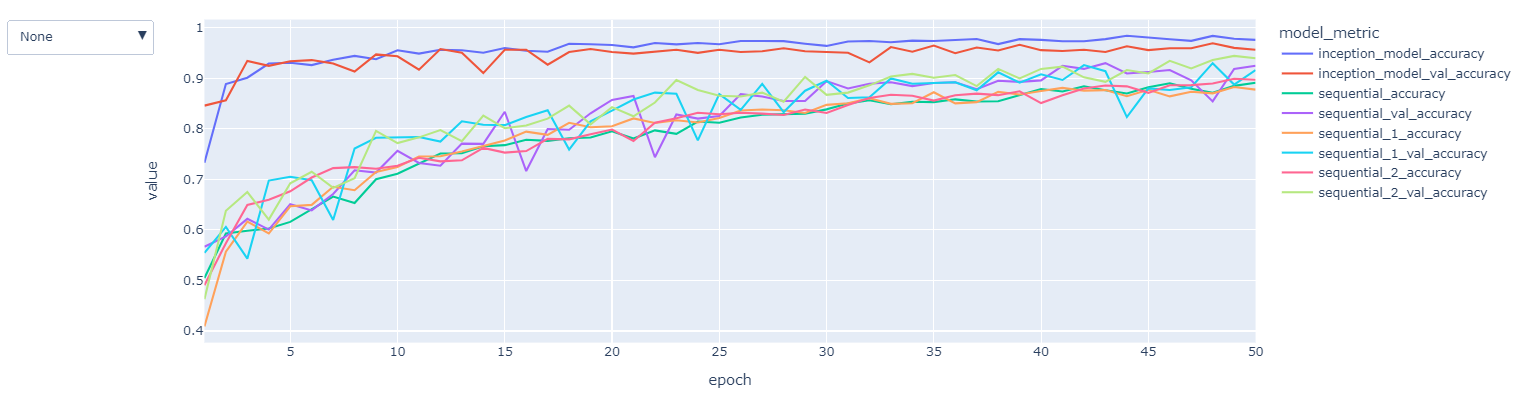

In [7]:
Image('../images/accuracies_models.png')

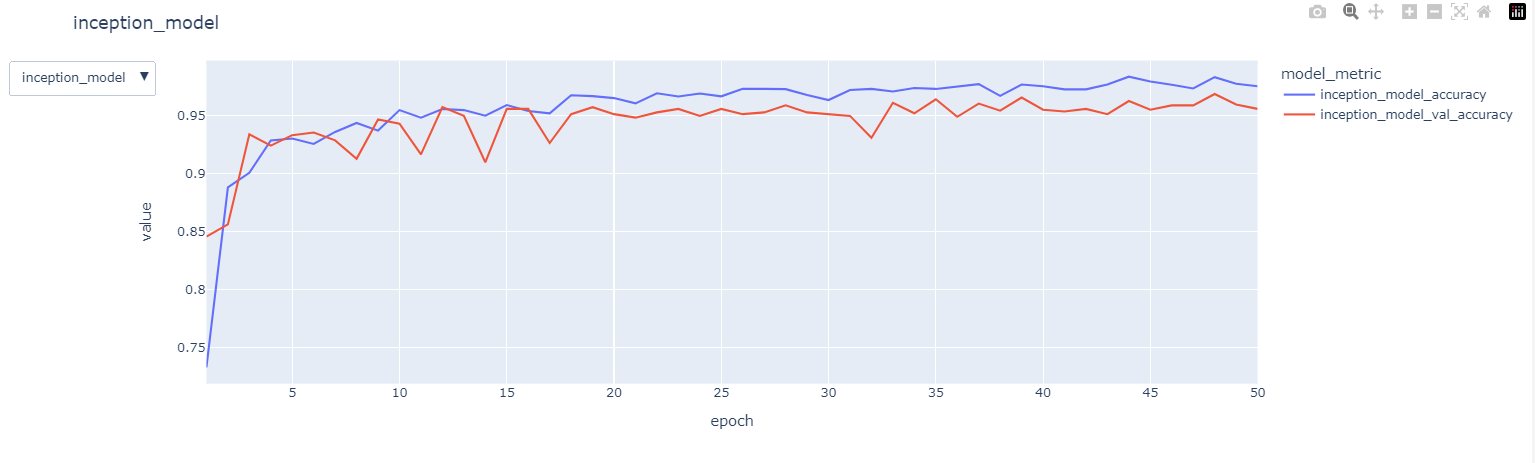

In [8]:
Image('../images/inception_model_accuracy.png')

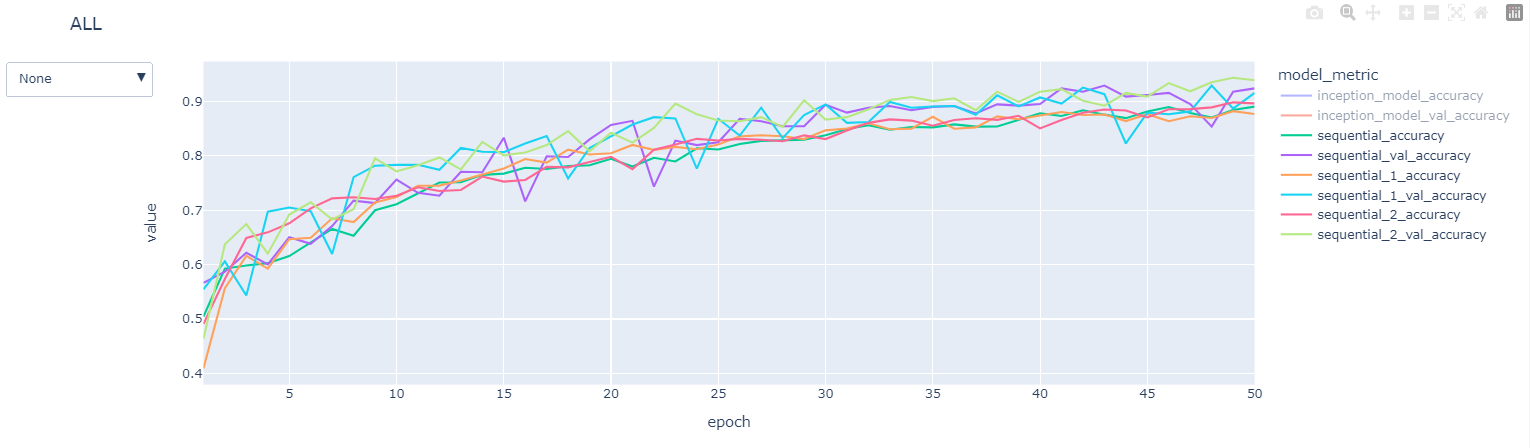

In [9]:
Image('../images/other_models_accuracies.png')

In [10]:
pio.write_html(fig, file='../dashboards/accuracy_line_chart.html', auto_open=True)

In [11]:
line_chart = LineChart(epoch_results=epoch_results_df)
line_chart.create_line_chart(metrics=['loss', 'val_loss'])

c:\Users\SILVAFRA\Anaconda3\envs\python-cvcourse\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



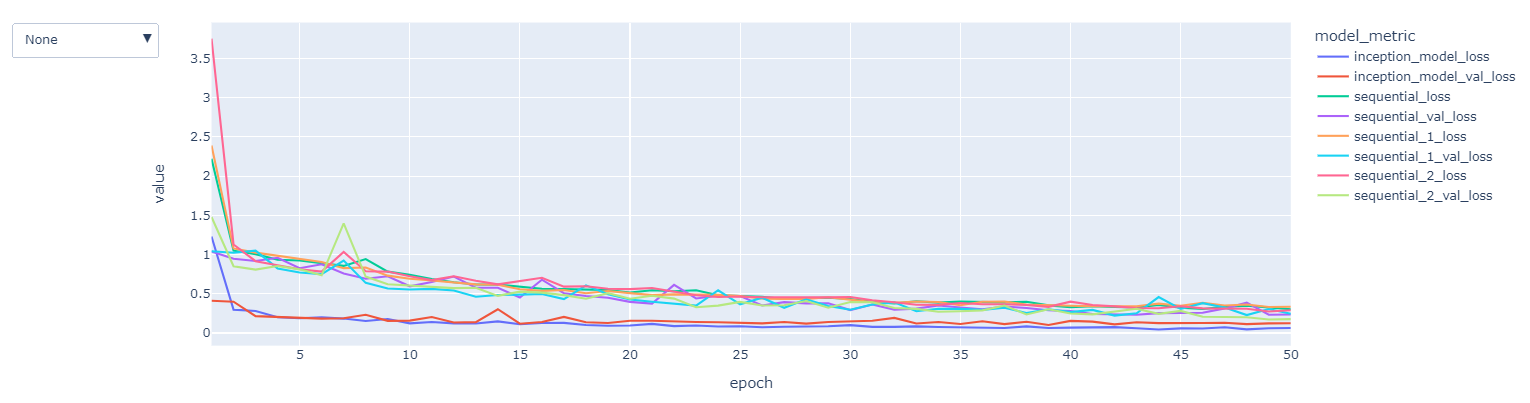

In [13]:
Image('../images/models_loss.png')

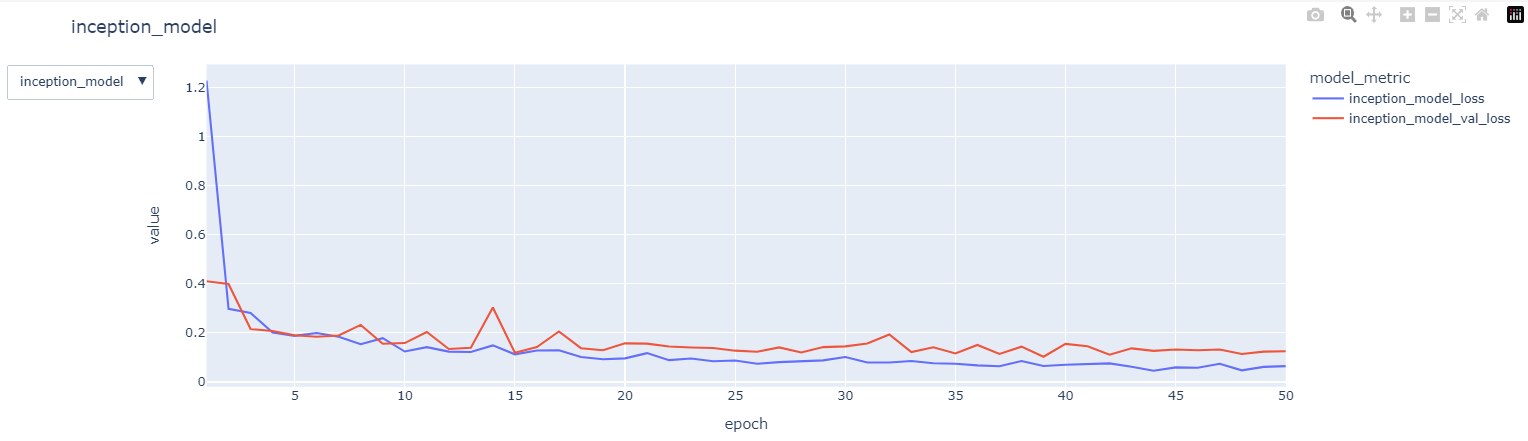

In [14]:
Image('../images/inception_model_loss.png')

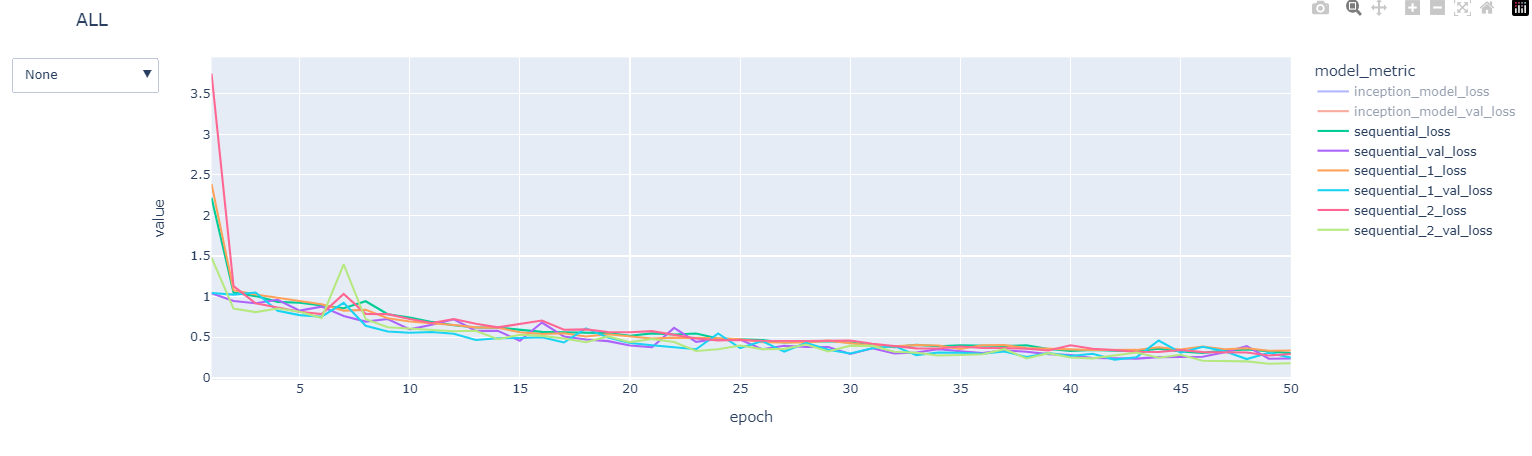

In [16]:
Image('../images/other_models_loss.png')

In [12]:
pio.write_html(fig, file='../dashboards/loss_line_chart.html', auto_open=True)

As we see from the charts above, the Inception model did outperform the simple CNN architectures. However, over time, simple CNN architectures caught up to Inceptions results.

Since the model was already pre-trained, Inception started with a very high training and validation accuracy (0.75 and 0.85 respectively), while simple CNN architectures, started between 0.45 and 0.50. When we look at loss, it is the same story, with validation accuracy for the Inception model already in the low 0.5s by the first epochs.

By the 50th epoch, its clear that the pre-trained Inception model is going to outperform the simple CNN architectures, reaching a validation accuracy above 0.95 and a validation loss below 0.2, while simple CNN architecture barely scratch the 0.90 mark in terms of validation accuracy, and are slightly below 0.3 in terms of validation loss.

However, we did see the simple CNN architectures being able to catch up pretty quickly to the pre-trained model, which suggests that this problem does not require a complicated architecture to reach a high accuracy. Considering time complexity of deploying a pre-trained version of the Inception model, it would be more feasible to make some tweaks to the simple CNN architectures (increasing number of filters, kernel size or add a couple of Dense layers) to see if the model would be able to reach te 0.95 threshold.